# Real-world Data Wrangling
### Project: Analyzing Movie Trends and Ratings - Insights from Netflix and MovieLens Data

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

### **1.1.** Problem Statement

**Research question:**
1. Questions about similarities and differences between the two platforms:    
Does Netflix prioritize movies with high ratings on MovieLens?

2. Questions about user behavior:     
How do the rating distributions of MovieLens users differ for movies available on Netflix compared to those not available on Netflix?

3. Questions about movie and user trends:     
How have trends in movie genres changed over the years on Netflix compared to MovieLens?


**Rationale**:
- Similarities and Differences      
Analyzing if Netflix prioritizes movies with high MovieLens ratings helps reveal if external ratings influence Netflix's content selection strategy and the alignment of user preferences across platforms.

- User Behavior     
Comparing rating distributions for movies on and off Netflix can show if Netflix curates higher-rated content or focuses on other factors like licensing or trends.

- Movie and User Trends 
Examining genre trends over time on Netflix and MovieLens highlights changing user preferences and platform strategies, offering insights into evolving movie consumption patterns.

**Approach**:
- Data Linking: Use common columns (movieId, imdbId, title) to link MovieLens and Netflix.
- Data Classification and Processing: Create the necessary data groups (movies on Netflix, movies not on Netflix, by year, genre).
- Calculation and Analysis: Compute averages, distributions, and necessary statistics.
- Visualization: Use charts to illustrate results and trends.
- Compare Results: Answer the research questions based on data analysis.

**Significance**:       
These research questions aim to better understand how user ratings, genre trends, and content availability influence viewing habits, and they offer valuable insights for streaming services, movie recommendations, and content curation strategies.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

File Name: netflix_titles.csv

Type: CSV File

Method: The data was gathered using the "Downloading files" method from Kaggle source.

Dataset variables:

* *show_id*: ID of the program  
* *type*: Type of program (Movie or TV Show)    
* *title*: Title of the program/movie   
* *director*: Director of the program/movie 
* *cast*: List of actors    
* *country*: Country of production  
* *date_added*: Date added to Netflix   
* *release_year*: Release year  
* *rating*: Age rating  
* *duration*: Duration (e.g., 90 min for movies or 1 Season for shows)  
* *listed_in*: Genre of the program/movie   
* *description*: Description of the program/movie content  

In [10]:
#FILL IN 1st data gathering and loading method
import pandas as pd

def gather_and_load_data(file_path):
    """
    This method will load the Netflix dataset from the provided file path.
    """
    try:
        # Load the dataset into a pandas DataFrame
        netflix_df = pd.read_csv(file_path)

        # Display the first few rows of the dataset to confirm it is loaded correctly
        print("Data loaded successfully. Here are the first few rows:")
        print(netflix_df.head())
        
        # Return the DataFrame
        return netflix_df

    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage
file_path = 'rawData/netflix_titles.csv'
netflix_data = gather_and_load_data(file_path)

Data loaded successfully. Here are the first few rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          

#### Dataset 2

Type: CSV File

Method: *The data was gathered using the "Downloading files" method from Kaggle source.

Dataset variables:

File Name: ratings.csv	
- *userId*: A unique identifier for each user who has rated a movie.  
- *movieId*: A unique identifier for each movie that has been rated.  
- *rating*: The rating given by the user to the movie, typically on a 5-star scale (with half-star increments).  
- *timestamp*: The time when the rating was given, recorded as the number of seconds since January 1, 1970 (UTC).

File Name: tags.csv    
- *userId*: A unique identifier for each user who has tagged a movie.  
- *movieId*: A unique identifier for each movie that has been tagged.  
- *tag*: The label or description that the user has assigned to the movie (e.g., "funny", "scary").  
- *timestamp*: The time when the tag was created, recorded as the number of seconds since January 1, 1970 (UTC).

File Name: movies.csv    	  
- *movieId*: A unique identifier for each movie.  
- *title*: The title of the movie, which may include the year of release in parentheses.  
- *genres*: A list of genres associated with the movie, separated by pipes (|), such as "Action", "Comedy", or "Drama".

File Name: links.csv  	
- *movieId*: A unique identifier for each movie.  
- *imdbId*: The identifier for the movie on IMDb (International Movie Database), linking to its IMDb page.  
- *tmdbId*: The identifier for the movie on The Movie Database (TMDb), linking to its TMDb page.

In [11]:
#FILL IN 2nd data gathering and loading method
import pandas as pd
import os

# Set the directory path where the MovieLens files are stored
global rawData_directory_path
rawData_directory_path = 'rawData/'

# Define the file paths for the dataset files
global ratings_file 
ratings_file = os.path.join(rawData_directory_path, 'ratings.csv')
global tags_file 
tags_file = os.path.join(rawData_directory_path, 'tags.csv')
global movies_file 
movies_file = os.path.join(rawData_directory_path, 'movies.csv')
global links_file 
links_file = os.path.join(rawData_directory_path, 'links.csv')

# FILL IN 2nd data gathering and loading method: Loading MovieLens data files into pandas DataFrames

# Load ratings data into a DataFrame
ratings_df = pd.read_csv(ratings_file)
print("Ratings Data Loaded:")
print(ratings_df.head())  # Display the first few rows of ratings data

# Load tags data into a DataFrame
tags_df = pd.read_csv(tags_file)
print("Tags Data Loaded:")
print(tags_df.head())  # Display the first few rows of tags data

# Load movies data into a DataFrame
movies_df = pd.read_csv(movies_file)
print("Movies Data Loaded:")
print(movies_df.head())  # Display the first few rows of movies data

# Load links data into a DataFrame
links_df = pd.read_csv(links_file)
print("Links Data Loaded:")
print(links_df.head())  # Display the first few rows of links data

Ratings Data Loaded:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
Tags Data Loaded:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200
Movies Data Loaded:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Advent

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [ ]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: Missing or Null Values

In [43]:
#FILL IN - Inspecting the dataframe visually

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

print(rawData_directory_path)
def check_missing_data_for_all_files(folder_path):
    """
    Function to check for missing data in all CSV files in a given folder.
    Prints details for files with missing or null values.

    Parameters:
    folder_path (str): The path to the folder containing CSV files.
    """
    # Loop through all files in the folder
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            print(f"\nInspecting file: {file}")
            
            # Load the dataframe
            df = pd.read_csv(file_path)
            # Check for missing or null values
            missing_summary = df.isnull().sum()
            missing_percent = df.isnull().mean() * 100
            
            if missing_summary.any():
                print("!!!!! Summary of missing/null values:")
                print(missing_summary)
                print("\n!!!!! Percentage of missing data in each column:")
                print(missing_percent)
                
                # Visualize missing data using a heatmap
                # print("\nVisualizing missing data:")
                # plt.figure(figsize=(10, 6))
                # sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
                # plt.title(f"Missing Data Heatmap for {file}")
                # plt.show()
            else:
                print("No missing or null values detected.")
        print('*' * 100)

# Example usage: Inspect all files in the 'rawData' folder
check_missing_data_for_all_files(rawData_directory_path)

rawData/

Inspecting file: links.csv
!!!!! Summary of missing/null values:
movieId    0
imdbId     0
tmdbId     8
dtype: int64

!!!!! Percentage of missing data in each column:
movieId    0.000000
imdbId     0.000000
tmdbId     0.082119
dtype: float64
****************************************************************************************************

Inspecting file: movies.csv
No missing or null values detected.
****************************************************************************************************

Inspecting file: netflix_titles.csv
!!!!! Summary of missing/null values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

!!!!! Percentage of missing data in each column:
show_id          0.000000
type             0.000000
title            0.000000
director     

**Issue and justification:**  

**1. File: links.csv**  
The links.csv file does not provide useful connections between MovieLens and Netflix, as tmdbId is unavailable and there is no direct link via imdbId => The links.csv file can be excluded as it does not directly support your analysis.   

To address your research questions on differences, user behavior, and trends, you only need:

movies.csv (MovieLens)  
ratings.csv (MovieLens) 
tags.csv (MovieLens)    
netflix_titles.csv (Netflix)    


**2. File: netflix_titles.csv** 
- ***Issue***:  
**director** column: 29.9% missing values (high).   
**cast** column: 9.36% missing values.  
**country** column: 9.43% missing values.   
Other minor issues: Missing values in **date_added**, **rating**, and **duration**. 

- ***Justification***:  
For research questions related to Netflix-specific data (e.g., trends in movie attributes such as cast, director, or country), missing values could affect the analysis:    

    If analyzing director trends or movie cast analysis, the high percentage of missing data in these columns could bias results.    
    The *country* column is critical for geographic trends. Missing values here may weaken insights about the regional distribution of movies.      
    *date_added* is essential for time-based trends, while *rating* and *duration* impact content analysis related to ratings and runtime.    

**Priority**: The netflix_titles.csv file contains significant missing values (particularly director, cast, and country) that could impact answers to research questions.

### Quality Issue 2: Inconsistent Formats

In [ ]:
#FILL IN - Inspecting the dataframe visually

# Import necessary libraries
import pandas as pd
import os
import re

def check_inconsistent_formats(folder_path):
    """
    Function to check for inconsistent formats in all CSV files within a folder.
    It inspects for:
    - Date format inconsistencies
    - Invalid numeric data
    - Unexpected formatting in string columns

    Parameters:
    folder_path (str): Path to the folder containing CSV files.
    """
    date_pattern = re.compile(r"\d{4}-\d{2}-\d{2}")  # Regex for YYYY-MM-DD date format

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            print(f"\nInspecting file: {file}")
            df = pd.read_csv(file_path)
            
            for column in df.columns:
                print(f"\nChecking column: {column}")
                
                # Check for date inconsistencies
                if "date" in column.lower() or "added" in column.lower():
                    column_values = df[column].dropna().astype(str)
                    invalid_dates = column_values.apply(lambda x: not bool(date_pattern.fullmatch(x)))
                    if invalid_dates.any():
                        print(f"  !!!!! Inconsistent date format detected in {column}. Example values:")
                        print(column_values[invalid_dates].head())
                
                # Check for numeric inconsistencies
                elif pd.api.types.is_numeric_dtype(df[column]):
                    invalid_numbers = df[column].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()
                    if invalid_numbers.any():
                        print(f"  !!!!! Invalid numeric format detected in {column}. Example values:")
                        print(df[column][invalid_numbers].head())
                
                # Check for string formatting inconsistencies
                elif pd.api.types.is_string_dtype(df[column]):
                    inconsistent_strings = df[column].dropna().apply(lambda x: x != x.strip() or x != x.capitalize())
                    if inconsistent_strings.any():
                        print(f"  !!!!! Inconsistent string formatting detected in {column}. Example values:")
                        print(df[column][inconsistent_strings].head())
        print('*' * 100)

# Example usage: Inspect all files in the 'rawData' folder
check_inconsistent_formats(rawData_directory_path)


Inspecting file: links.csv

Checking column: movieId

Checking column: imdbId

Checking column: tmdbId
  ///// Invalid numeric format detected in tmdbId. Example values:
624    NaN
843    NaN
2141   NaN
3027   NaN
5532   NaN
Name: tmdbId, dtype: float64
****************************************************************************************************

Inspecting file: movies.csv

Checking column: movieId

Checking column: title
  ///// Inconsistent string formatting detected in title. Example values:
0                      Toy Story (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
7                   Tom and Huck (1995)
Name: title, dtype: object

Checking column: genres
  ///// Inconsistent string formatting detected in genres. Example values:
0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                

**Issue and justification:**  

**1. File: links.csv** 
- ***Issue***:   No direct link between MovieLens and Netflix using tmdbId or imdbId.   
***Justification***: The file does not provide the necessary connections between the two platforms for research questions. Since tmdbId and imdbId do not match or help link data, this file is not useful for the analysis.    

**2. File: movies.csv** 
- ***Issue***:   Inconsistent string formatting in the title and genres columns (e.g., year in parentheses in titles, multiple genres separated by '|').    
***Justification***: These inconsistencies can create difficulties when comparing movie data across platforms, especially with title and genres formatting. Data cleaning and normalization are necessary to ensure accurate comparisons between MovieLens and Netflix. 

**3. File: ratings.csv** 
- ***Issue***:   No significant issues found in column formatting, but user ratings are limited to the MovieLens platform.  
***Justification***: The file is critical for understanding user preferences and behavior on MovieLens. It helps answer research questions about how MovieLens users rate movies compared to Netflix.   

**4. File: tags.csv** 
- ***Issue***:   Inconsistent string formatting in the tag column (e.g., "funny", "will ferrell", "MMA").   
***Justification***: Inconsistent tags can lead to challenges in analyzing user-generated content, but the file is useful for understanding user preferences based on genre or content description. Data cleaning is needed to ensure consistency and enable useful analysis.   

**5. File: netflix_titles.csv** 
- ***Issue***:   Inconsistent string formatting in several columns (e.g., title, listed_in, description), and inconsistent date format in date_added.   
***Justification***: These inconsistencies can hinder analysis and comparison between Netflix and MovieLens data. Cleaning and normalizing the data will be required to ensure accurate insights regarding movie trends, user behavior, and ratings across platforms.   

### Quality Issue 3: Outliers or Invalid Data

In [44]:
#FILL IN - Inspecting the dataframe visually
# Import necessary libraries
import pandas as pd
import os
import numpy as np
import re

def detect_outliers_invalid_data(folder_path):
    """
    Function to detect outliers and invalid data in numeric and string columns within all CSV files in a folder.
    It identifies:
    - Outliers in numeric columns using IQR method
    - Invalid numeric or date values
    - String formatting issues

    Parameters:
    folder_path (str): Path to the folder containing CSV files.
    """
    # Regex for YYYY-MM-DD date format
    date_pattern = re.compile(r"\d{4}-\d{2}-\d{2}")
    
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            print(f"\nInspecting file: {file}")
            df = pd.read_csv(file_path)
            
            for column in df.columns:
                print(f"\nChecking column: {column}")
                
                # Outliers Detection for Numeric Columns
                if pd.api.types.is_numeric_dtype(df[column]):
                    Q1 = df[column].quantile(0.25)
                    Q3 = df[column].quantile(0.75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
                    
                    if not outliers.empty:
                        print(f"  !!!!! Outliers detected in {column}. Example values:")
                        print(outliers[column].head())

                # Invalid Numeric Data Detection
                elif pd.api.types.is_numeric_dtype(df[column]) or column.lower().startswith("id"):
                    invalid_numbers = df[column].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()
                    if invalid_numbers.any():
                        print(f"  !!!!! Invalid numeric format detected in {column}. Example values:")
                        print(df[column][invalid_numbers].head())
                    
                # Invalid Date Format Detection
                elif "date" in column.lower() or "added" in column.lower():
                    column_values = df[column].dropna().astype(str)
                    invalid_dates = column_values.apply(lambda x: not bool(date_pattern.fullmatch(x)))
                    if invalid_dates.any():
                        print(f"  !!!!! Invalid date format detected in {column}. Example values:")
                        print(column_values[invalid_dates].head())
                    
                # String Formatting Issues
                elif pd.api.types.is_string_dtype(df[column]):
                    inconsistent_strings = df[column].dropna().apply(lambda x: x != x.strip())
                    if inconsistent_strings.any():
                        print(f"  !!!!! Inconsistent string formatting detected in {column}. Example values:")
                        print(df[column][inconsistent_strings].head())
            
            print('*' * 100)

# Example usage: Inspect all files in the 'rawData' folder
detect_outliers_invalid_data(rawData_directory_path)


Inspecting file: links.csv

Checking column: movieId
  !!!!! Outliers detected in movieId. Example values:
9706    186587
9707    187031
9708    187541
9709    187593
9710    187595
Name: movieId, dtype: int64

Checking column: imdbId
  !!!!! Outliers detected in imdbId. Example values:
7641    1934231
7744    1972663
7811    1955162
7815    2112999
7817    2011971
Name: imdbId, dtype: int64

Checking column: tmdbId
  !!!!! Outliers detected in tmdbId. Example values:
50      97406.0
69     124626.0
75     146599.0
110    290157.0
111    110972.0
Name: tmdbId, dtype: float64
****************************************************************************************************

Inspecting file: movies.csv

Checking column: movieId
  !!!!! Outliers detected in movieId. Example values:
9706    186587
9707    187031
9708    187541
9709    187593
9710    187595
Name: movieId, dtype: int64

Checking column: title
  !!!!! Inconsistent string formatting detected in title. Example values:
5609  

**Issue and justification:**  

**1. File: links.csv**  
The links.csv file does not provide useful connections between MovieLens and Netflix, as tmdbId is unavailable and there is no direct link via imdbId => The links.csv file can be excluded as it does not directly support your analysis.   

To address your research questions on differences, user behavior, and trends, you only need:

movies.csv (MovieLens)  
ratings.csv (MovieLens) 
tags.csv (MovieLens)    
netflix_titles.csv (Netflix)    


**2. File: netflix_titles.csv** 
- ***Issue***:  
**director** column: 29.9% missing values (high).   
**cast** column: 9.36% missing values.  
**country** column: 9.43% missing values.   
Other minor issues: Missing values in **date_added**, **rating**, and **duration**. 

- ***Justification***:  
For research questions related to Netflix-specific data (e.g., trends in movie attributes such as cast, director, or country), missing values could affect the analysis:    

    If analyzing director trends or movie cast analysis, the high percentage of missing data in these columns could bias results.    
    The *country* column is critical for geographic trends. Missing values here may weaken insights about the regional distribution of movies.      
    *date_added* is essential for time-based trends, while *rating* and *duration* impact content analysis related to ratings and runtime.    

**Priority**: The netflix_titles.csv file contains significant missing values (particularly director, cast, and country) that could impact answers to research questions.

### Tidiness Issue 1: Multiple Records Per Movie    
Issue: In tags.csv or ratings.csv, there may be multiple rows for the same movieId, which could create issues when analyzing the data. This is especially true for movies that receive multiple ratings or tags by different users. 
Impact: The dataset is not in "tidy" form because each observation (i.e., each movie-user interaction) should be in a single row, and multiple entries for the same movie can lead to unnecessary complexity.   

In [47]:
#FILL IN - Inspecting the dataframe visually
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visually inspect duplicate rows for a specific column
def inspect_duplicates_visually(folder_path, target_column='movieId'):
    """
    Inspects duplicate occurrences of a target column visually across all CSV files.
    - Highlights files with duplicates and visualizes the counts.

    Parameters:
    folder_path (str): Path to the folder containing CSV files.
    target_column (str): Column to check for duplicate occurrences.
    """
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            print(f"\nInspecting file: {file}")
            
            try:
                # Load CSV file
                df = pd.read_csv(file_path)
                
                if target_column in df.columns:
                    # Count occurrences of target_column
                    counts = df[target_column].value_counts()
                    duplicates = counts[counts > 1]
                    
                    if not duplicates.empty:
                        print(f"  Found duplicates in column '{target_column}': {len(duplicates)} duplicate IDs")
                        print(duplicates.head(10))  # Print top 10 duplicates for review

                    else:
                        print(f"  No duplicates found in column '{target_column}'.")
                else:
                    print(f"  Column '{target_column}' not found in this file.")
            except Exception as e:
                print(f"  Error processing file {file}: {e}")
        print('*'*100)

# Example usage: Inspect 'movieId' duplicates visually across CSV files
inspect_duplicates_visually(rawData_directory_path, target_column='movieId')


Inspecting file: links.csv
  No duplicates found in column 'movieId'.
****************************************************************************************************

Inspecting file: movies.csv
  No duplicates found in column 'movieId'.
****************************************************************************************************

Inspecting file: netflix_titles.csv
  Column 'movieId' not found in this file.
****************************************************************************************************

Inspecting file: ratings.csv
  Found duplicates in column 'movieId': 6278 duplicate IDs
movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: count, dtype: int64
****************************************************************************************************

Inspecting file: tags.csv
  Found duplicates in column 'movieId': 558 duplicate IDs
movieId
296       181
2959       54
924      

**Issue and Justification:**

- **Issue:** The column 'movieId' is missing in the `netflix_titles.csv` file, and there are duplicate entries found in the `ratings.csv` and `tags.csv` files. Specifically, the `ratings.csv` file has 6,278 duplicate 'movieId' entries, while the `tags.csv` file has 558 duplicate entries.
  
- **Justification:** These duplicates in the `ratings.csv` and `tags.csv` files may cause data inconsistency, leading to inaccurate analyses or results. The absence of the 'movieId' column in the `netflix_titles.csv` file prevents the data from being properly linked to the other files, making it difficult to perform complete data analysis or merging.

### Tidiness Issue 2: Redundant or Duplicated Columns   
Issue: In movies.csv, the column movieId in the links.csv might duplicate data that already exists in the movies.csv. This can make the dataset more cumbersome to work with.
Impact: Redundant columns add unnecessary complexity to the dataset and can cause confusion when merging datasets or conducting analysis.

In [49]:
#FILL IN - Inspecting the dataframe visually
# Import necessary libraries
import pandas as pd
import os

def handle_redundant_columns(folder_path):
    """
    Function to detect and drop redundant or duplicated columns in CSV files within a folder.
    It identifies columns with:
    - Duplicate names
    - Perfectly identical data across multiple columns

    Parameters:
    folder_path (str): Path to the folder containing CSV files.
    """
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            print(f"\nProcessing file: {file}")
            df = pd.read_csv(file_path)

            # Identify duplicate column names
            duplicate_columns = df.columns[df.columns.duplicated()].tolist()
            if duplicate_columns:
                print(f"  !!!!! Duplicate column names detected: {duplicate_columns}")

            # Identify redundant columns (identical data)
            redundant_columns = []
            for i, col1 in enumerate(df.columns):
                for j, col2 in enumerate(df.columns):
                    if i < j and df[col1].equals(df[col2]):
                        redundant_columns.append(col2)
            print("No redundant columns found in this file")

            if redundant_columns:
                print(f"  !!!!! Redundant columns detected: {redundant_columns}")

# Example usage: Clean all files in the 'rawData' folder
handle_redundant_columns(rawData_directory_path)


Processing file: links.csv
No redundant columns found in this file

Processing file: movies.csv
No redundant columns found in this file

Processing file: netflix_titles.csv
No redundant columns found in this file

Processing file: ratings.csv
No redundant columns found in this file

Processing file: tags.csv
No redundant columns found in this file


Issue and justification: No redundant columns found in the data.

### Tidiness Issue 3: Non-Normalized Genre Information      
Issue: The genres column in movies.csv lists multiple genres as a single string separated by "|". This is not a tidy format since each genre should ideally be in a separate row.
Impact: The non-normalized format makes it difficult to perform analysis that requires separating the genres, such as counting how many movies fall into each genre or analyzing trends based on specific genres.

In [9]:
# Import necessary libraries
import pandas as pd
import os

# Path to the movies.csv file
file_path = "rawData/movies.csv"

# Normalize the genres column in movies.csv.
# Splits the genres column by '|' and creates a new row for each genre.
print(f"\nNormalizing genre information for file: movies.csv")

# Read the original file
df = pd.read_csv(file_path)

# Check if the genres column exists
if 'genres' in df.columns:
    print(f"  Inspecting the dataframe visually...")
    print(df.head())  # Inspect the first few rows of the original DataFrame

    # Split the genres column into multiple rows
    df_normalized = (
        df.assign(genres=df['genres'].str.split('|'))
          .explode('genres')
          .reset_index(drop=True)
    )
    
    # Print the normalized DataFrame
    print(f"\n  Normalized Dataframe Preview:")
    print(df_normalized.head(10))  # Display the first 10 rows of the normalized DataFrame

    # Display comparison of row counts
    print(f"  Normalization completed. Original rows: {len(df)}, Normalized rows: {len(df_normalized)}")
    
else:
    print(f"  'genres' column not found in movies.csv. Skipping normalization.")


Normalizing genre information for file: movies.csv
  Inspecting the dataframe visually...
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

  Normalized Dataframe Preview:
   movieId                    title     genres
0        1         Toy Story (1995)  Adventure
1        1         Toy Story (1995)  Animation
2        1         Toy Story (1995)   Children
3        1         Toy Story (1995)     Comedy
4        1         Toy Story (1995)    Fantasy

**Issue and justification:**  

**File: movies.csv** 
- ***Issue***:   The genres column in the original movies.csv contains multiple genres as a single string separated by "|". This format is not tidy because each genre should be represented in its own row.    
- ***Justification***: The non-normalized format makes it difficult to analyze genres individually (e.g., counting movies per genre or analyzing trends). Normalizing the data by splitting genres into separate rows enables more granular and accurate analysis.    

## 3. Clean data
Clean the data to solve the 6 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [77]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
# Import necessary libraries
import pandas as pd
import os

def make_copies_of_datasets(folder_path):
    """
    Function to make copies of all CSV files in the specified folder
    to ensure raw dataframes remain unmodified.

    Parameters:
    folder_path (str): Path to the folder containing the raw CSV files.

    Returns:
    dataframes (dict): A dictionary containing the original and copied dataframes.
    """
    dataframes = {}
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            print(f"\nLoading file: {file}")
            
            # Load the raw dataset
            raw_df = pd.read_csv(file_path)
            
            # Make a copy of the dataset
            print(f"  Creating a copy of the dataset to ensure the raw data is not impacted.")
            copied_df = raw_df.copy()
            
            # Save both raw and copied dataframes in a dictionary
            dataframes[file] = {"raw": raw_df, "copy": copied_df}
            
            # Print a preview of the copied dataframe
            print(f"  Preview of copied dataframe for {file}:\n{copied_df.head()}")
    
    return dataframes


# Example usage: Pass the directory path where raw CSV files are stored
backupData_directory_path = "rawData"  # Replace with the actual directory path
copied_dataframes = make_copies_of_datasets(backupData_directory_path)

global cleaned_file_path
cleaned_file_path = "cleanedData/"


Loading file: links.csv
  Creating a copy of the dataset to ensure the raw data is not impacted.
  Preview of copied dataframe for links.csv:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

Loading file: movies.csv
  Creating a copy of the dataset to ensure the raw data is not impacted.
  Preview of copied dataframe for movies.csv:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance 

### **Quality Issue 1: Missing or Null Values**

In [78]:
# FILL IN - Apply the cleaning strategy
import pandas as pd
import os

# Clean netflix_titles.csv
file_path = rawData_directory_path + "netflix_titles.csv"  

"""
    Clean missing or null values in the netflix_titles.csv dataset.
    Handles missing values based on the nature of each column.

"""
print(f"\nInspecting file: {file_path.split('/')[-1]}")
    
    # Load the dataset
df = pd.read_csv(file_path)
    
    # Summary of missing values
missing_summary = df.isnull().sum()
missing_percentage = (df.isnull().mean() * 100).round(2)
print("!!!!! Summary of missing/null values:")
print(missing_summary)
print("\n!!!!! Percentage of missing data in each column:")
print(missing_percentage)
print("*****************")
    
    # Handling missing values column-wise
print("Handling missing values:")
    
    # 1. 'director': Replace with "Unknown Director"
if 'director' in df.columns:
    df['director'].fillna("Unknown Director", inplace=True)
    print("  - Filled missing 'director' values with 'Unknown Director'")
    
    # 2. 'cast': Replace with "Unknown Cast"
if 'cast' in df.columns:
    df['cast'].fillna("Unknown Cast", inplace=True)
    print("  - Filled missing 'cast' values with 'Unknown Cast'")
    
    # 3. 'country': Replace with "Unknown Country"
if 'country' in df.columns:
    df['country'].fillna("Unknown Country", inplace=True)
    print("  - Filled missing 'country' values with 'Unknown Country'")
    
# 4. 'date_added': Replace with "Not Available"
if 'date_added' in df.columns:
    df['date_added'].fillna("Not Available", inplace=True)
    print("  - Filled missing 'date_added' values with 'Not Available'")
    
# 5. 'rating': Replace with the most frequent value (mode)
if 'rating' in df.columns:
    mode_rating = df['rating'].mode()[0]
    df['rating'].fillna(mode_rating, inplace=True)
    print(f"  - Filled missing 'rating' values with mode value: {mode_rating}")
    
# 6. 'duration': Replace with "Unknown Duration"
if 'duration' in df.columns:
    df['duration'].fillna("Unknown Duration", inplace=True)
    print("  - Filled missing 'duration' values with 'Unknown Duration'")
    
# Ensure the cleaned file directory exists
os.makedirs(cleaned_file_path, exist_ok=True)

# Save the cleaned dataset
original_file_name = "netflix_titles.csv"  # Extract original file name
cleaned_file_name = original_file_name.replace(".csv", "_cleaned.csv")  # Add "_cleaned" suffix
cleaned_full_path = os.path.join(cleaned_file_path, cleaned_file_name)  # Combine folder and file name

# Save the cleaned dataset
df.to_csv(cleaned_full_path, index=False)
print(f"\nCleaned file saved as: {cleaned_full_path}")




Inspecting file: netflix_titles.csv
!!!!! Summary of missing/null values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

!!!!! Percentage of missing data in each column:
show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       1.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64
*****************
Handling missing values:
  - Filled missing 'director' values with 'Unknown Director'
  - Filled missing 'cast' values with 'Unknown Cast'
  - Filled missing 'country' values with 'Unknown Country'
  - Filled missing 'date_added' values with 'Not Available'
  - Filled missing 'rating' values with mode value: TV-

C:\Users\Thao Ho\AppData\Local\Temp\ipykernel_8116\93382917.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna("Unknown Director", inplace=True)
C:\Users\Thao Ho\AppData\Local\Temp\ipykernel_8116\93382917.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [21]:
# FILL IN - Validate the cleaning was successful
import pandas as pd

# Read the cleaned CSV file into a DataFrame
file_path = "cleanedData/netflix_titles_cleaned.csv"
df = pd.read_csv(file_path)

# Check for missing or null values in each column
missing_values = df.isnull().sum()

print("Missing or Null values in each column:")
print(missing_values)

# If there are no missing or null values, report success
if missing_values.sum() == 0:
    print("The cleaning was successful: No missing or null values.")
else:
    print("The cleaning was unsuccessful: There are missing or null values.")



Missing or Null values in each column:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
The cleaning was successful: No missing or null values.


**Justification**: After cleaning and validating the dataset, all columns have been successfully processed, and no missing or null values remain. This ensures the data is complete and ready for further analysis.

### **Quality Issue 2: Inconsistent Formats**

In [79]:
#FILL IN - Apply the cleaning strategy
import pandas as pd
import re
from datetime import datetime

# Function to clean inconsistent string formatting
def clean_string_column(df, column_name):
    df[column_name] = df[column_name].str.strip()  # Remove leading/trailing spaces
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'\s+', ' ', str(x)))  # Replace multiple spaces with a single space
    return df

# Function to clean inconsistent date format in 'date_added' column
def clean_date_column(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name], errors='coerce').dt.strftime('%B %d, %Y')  # Convert to consistent date format
    return df

# Clean movies.csv
raw_movies_file = rawData_directory_path + "movies.csv"
movies_df = pd.read_csv(raw_movies_file)
cleaned_movies_path = cleaned_file_path + "movies_cleaned.csv"
print("\nInspecting file: movies.csv")

# Cleaning movieId (ensure it's in integer format)
print("Checking column: movieId")
movies_df['movieId'] = movies_df['movieId'].astype(int)

# Cleaning title column (strip spaces, replace multiple spaces)
print("Checking column: title")
movies_df = clean_string_column(movies_df, 'title')

# Cleaning genres column (strip spaces, replace multiple spaces)
print("Checking column: genres")
movies_df = clean_string_column(movies_df, 'genres')

# Save cleaned movies.csv
movies_df.to_csv(cleaned_movies_path, index=False)
print("-------------> Cleaned file saved as:", cleaned_movies_path)

##########################################
# Clean netflix_titles.csv
netflix_file = "cleanedData/netflix_titles_cleaned.csv"
netflix_df = pd.read_csv(netflix_file)
print("\nInspecting file: netflix_titles.csv")

# Cleaning show_id column (strip spaces, ensure no special characters)
print("Checking column: show_id")
netflix_df['show_id'] = netflix_df['show_id'].str.strip()

# Cleaning type column (standardize case)
print("Checking column: type")
netflix_df['type'] = netflix_df['type'].str.strip().str.title()

# Cleaning title column (strip spaces, replace multiple spaces)
print("Checking column: title")
netflix_df = clean_string_column(netflix_df, 'title')

# Cleaning date_added column (convert to consistent date format)
print("Checking column: date_added")
netflix_df = clean_date_column(netflix_df, 'date_added')

# Cleaning listed_in column (strip spaces, replace multiple spaces)
print("Checking column: listed_in")
netflix_df = clean_string_column(netflix_df, 'listed_in')

# Cleaning description column (strip spaces, replace multiple spaces)
print("Checking column: description")
netflix_df = clean_string_column(netflix_df, 'description')

# Save cleaned netflix_titles.csv
netflix_df.to_csv(netflix_file, index=False)
print("-------------> Cleaned file saved as:", netflix_file)

##########################################
# Clean ratings.csv
cleaned_ratings_file = "cleanedData/ratings_cleaned.csv"
ratings_df = pd.read_csv("rawData/ratings.csv")
print("\nInspecting file: ratings.csv")

# Ensure movieId is integer and userId is consistent
print("Checking column: movieId")
ratings_df['movieId'] = ratings_df['movieId'].astype(int)

# Save cleaned ratings.csv
ratings_df.to_csv(cleaned_ratings_file, index=False)
print("-------------> Cleaned file saved as:", cleaned_ratings_file)

# Clean tags.csv
cleaned_tags_file = "cleanedData/tags_cleaned.csv"
tags_df = pd.read_csv("rawData/tags.csv")
print("\nInspecting file: tags.csv")

# Cleaning tag column (strip spaces, replace multiple spaces)
print("Checking column: tag")
tags_df = clean_string_column(tags_df, 'tag')

# Save cleaned tags.csv
tags_df.to_csv(cleaned_tags_file, index=False)
print("-------------> Cleaned file saved as:", cleaned_tags_file)


Inspecting file: movies.csv
Checking column: movieId
Checking column: title
Checking column: genres
-------------> Cleaned file saved as: cleanedData/movies_cleaned.csv

Inspecting file: netflix_titles.csv
Checking column: show_id
Checking column: type
Checking column: title
Checking column: date_added
Checking column: listed_in
Checking column: description
-------------> Cleaned file saved as: cleanedData/netflix_titles_cleaned.csv

Inspecting file: ratings.csv
Checking column: movieId
-------------> Cleaned file saved as: cleanedData/ratings_cleaned.csv

Inspecting file: tags.csv
Checking column: tag
-------------> Cleaned file saved as: cleanedData/tags_cleaned.csv


In [31]:
#FILL IN - Validate the cleaning was successful
import pandas as pd

# Hàm kiểm tra dữ liệu sau khi đã làm sạch
def validate_cleaning(file_path, columns_to_check):
    # Đọc lại file đã làm sạch
    df = pd.read_csv(file_path)
    print(f"\nInspecting cleaned file: {file_path.split('/')[-1]}")

    # Kiểm tra từng cột đã làm sạch
    for column in columns_to_check:
        print(f"Checking column: {column}")
        
        if df[column].isnull().sum() == 0:
            print(f"  - No missing values in column: {column}")
        else:
            print(f"  - Missing values detected in column: {column}")
        
        # Kiểm tra tính nhất quán của chuỗi
        if df[column].dtype == 'object':
            example_values = df[column].head(5).tolist()
            print(f"  - Example values in column '{column}': {example_values}")
        
    print(f"-------------> Cleaned file validated: {file_path.split('/')[-1]}\n")

# Cấu trúc cột cần kiểm tra cho từng file đã làm sạch
files_to_validate = {
    'cleanedData/movies_cleaned.csv': ['movieId', 'title', 'genres'],
    'cleanedData/netflix_titles_cleaned.csv': ['show_id', 'type', 'title', 'date_added', 'listed_in', 'description'],
    'cleanedData/ratings_cleaned.csv': ['movieId'],
    'cleanedData/tags_cleaned.csv': ['tag']
}

# Kiểm tra từng file đã làm sạch
for file_path, columns_to_check in files_to_validate.items():
    validate_cleaning(file_path, columns_to_check)


Inspecting cleaned file: movies_cleaned.csv
Checking column: movieId
  - No missing values in column: movieId
Checking column: title
  - No missing values in column: title
  - Example values in column 'title': ['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)']
Checking column: genres
  - No missing values in column: genres
  - Example values in column 'genres': ['Adventure|Animation|Children|Comedy|Fantasy', 'Adventure|Children|Fantasy', 'Comedy|Romance', 'Comedy|Drama|Romance', 'Comedy']
-------------> Cleaned file validated: movies_cleaned.csv


Inspecting cleaned file: netflix_titles_cleaned.csv
Checking column: show_id
  - No missing values in column: show_id
  - Example values in column 'show_id': ['s1', 's2', 's3', 's4', 's5']
Checking column: type
  - No missing values in column: type
  - Example values in column 'type': ['Movie', 'Tv Show', 'Tv Show', 'Tv Show', 'Tv Show']
Checking column: title
 

**Justification**: After cleaning and validating the dataset, all columns have been successfully processed, and no inconsistent format of values remain. This ensures the data is complete and ready for further analysis.

### **Quality Issue 3: Outliers or Invalid Data**

In [80]:
#FILL IN - Apply the cleaning strategy
import pandas as pd
import numpy as np

# Hàm xử lý outliers
def remove_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    # Tính toán ngưỡng cho các outliers
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    
    # Loại bỏ outliers bằng cách giữ lại các giá trị trong khoảng [lower_bound, upper_bound]
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"  - Outliers removed from column '{column}'.")
    return df_cleaned

# Hàm xử lý lỗi định dạng ngày tháng
def clean_date_format(df, column):
    # Chuyển đổi định dạng ngày tháng thành kiểu datetime
    df[column] = pd.to_datetime(df[column], errors='coerce')  # 'coerce' chuyển lỗi thành NaT
    print(f"  - Invalid date format fixed in column '{column}'.")
    return df

# Hàm xử lý outliers và dữ liệu không hợp lệ cho các file
def clean_file(file_path, outlier_columns, date_columns):
    # Đọc dữ liệu từ file
    df = pd.read_csv(file_path)
    print(f"\nInspecting and cleaning file: {file_path.split('/')[-1]}")

    # Xử lý outliers trong các cột numeric
    for column in outlier_columns:
        df = remove_outliers(df, column)

    # Xử lý lỗi định dạng ngày tháng
    for column in date_columns:
        df = clean_date_format(df, column)

    # Lưu file đã làm sạch
    cleaned_file_path = f"cleanedData/{file_path.split('/')[-1].replace('.csv', '_cleaned.csv')}"
    df.to_csv(cleaned_file_path, index=False)
    print(f"-------------> Cleaned file saved as: {cleaned_file_path}\n")
    
    return df

# Các cột có outliers cần xử lý cho từng file
files_to_clean = {
    'movies.csv': {
        'outlier_columns': ['movieId'],
        'date_columns': []
    },
    'netflix_titles.csv': {
        'outlier_columns': ['release_year'],
        'date_columns': ['date_added']
    },
    'ratings.csv': {
        'outlier_columns': ['movieId', 'rating'],
        'date_columns': []
    },
    'tags.csv': {
        'outlier_columns': ['userId', 'movieId'],
        'date_columns': []
    }
}

# Thực hiện làm sạch dữ liệu cho từng file
for file_path, columns in files_to_clean.items():
    clean_file(f"rawData/{file_path}", columns['outlier_columns'], columns['date_columns'])


Inspecting and cleaning file: movies.csv
  - Outliers removed from column 'movieId'.
-------------> Cleaned file saved as: cleanedData/movies_cleaned.csv


Inspecting and cleaning file: netflix_titles.csv
  - Outliers removed from column 'release_year'.
  - Invalid date format fixed in column 'date_added'.
-------------> Cleaned file saved as: cleanedData/netflix_titles_cleaned.csv


Inspecting and cleaning file: ratings.csv
  - Outliers removed from column 'movieId'.
  - Outliers removed from column 'rating'.
-------------> Cleaned file saved as: cleanedData/ratings_cleaned.csv


Inspecting and cleaning file: tags.csv
  - Outliers removed from column 'userId'.
  - Outliers removed from column 'movieId'.
-------------> Cleaned file saved as: cleanedData/tags_cleaned.csv



In [33]:
#FILL IN - Validate the cleaning was successful
import pandas as pd

# Function to check if outliers were removed
def validate_outliers(df, column, expected_outliers_removed=True):
    # Check for any outliers beyond the 1st and 99th percentile range
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    if outliers.empty:
        print(f"  - No outliers detected in column '{column}'.")
    else:
        print(f"  - Outliers still present in column '{column}':")
        print(outliers[column].head())  # Print a sample of detected outliers

# Function to check if invalid dates have been handled
def validate_date_format(df, column):
    invalid_dates = df[column].isna()  # Check for NaT (invalid date)
    
    if invalid_dates.any():
        print(f"  - Invalid dates still present in column '{column}':")
        print(df[invalid_dates][column].head())  # Print a sample of invalid dates
    else:
        print(f"  - No invalid dates detected in column '{column}'.")

# Function to validate the cleaning was successful for each file
def validate_file(file_path, outlier_columns, date_columns):
    df = pd.read_csv(file_path)
    print(f"\nValidating cleaned file: {file_path.split('/')[-1]}")

    # Validate outliers removal in numeric columns
    for column in outlier_columns:
        validate_outliers(df, column)
    
    # Validate date format in date columns
    for column in date_columns:
        validate_date_format(df, column)

    print(f"-------------> Validation completed for: {file_path.split('/')[-1]}\n")

# Configuration for validation (columns to check)
files_to_validate = {
    'cleanedData/movies_cleaned.csv': {
        'outlier_columns': ['movieId'],
        'date_columns': []
    },
    'cleanedData/netflix_titles_cleaned.csv': {
        'outlier_columns': ['release_year'],
        'date_columns': ['date_added']
    },
    'cleanedData/ratings_cleaned.csv': {
        'outlier_columns': ['movieId', 'rating'],
        'date_columns': []
    },
    'cleanedData/tags_cleaned.csv': {
        'outlier_columns': ['userId', 'movieId'],
        'date_columns': []
    }
}

# Validate the cleaning for each file
for file_path, columns in files_to_validate.items():
    validate_file(file_path, columns['outlier_columns'], columns['date_columns'])


Validating cleaned file: movies_cleaned.csv
  - Outliers still present in column 'movieId':
0    111
1    112
2    113
3    116
4    117
Name: movieId, dtype: int64
-------------> Validation completed for: movies_cleaned.csv


Validating cleaned file: netflix_titles_cleaned.csv
  - Outliers still present in column 'release_year':
41     1978
42     1983
130    1982
174    1980
452    1983
Name: release_year, dtype: int64
  - Invalid dates still present in column 'date_added':
6038    NaN
6051    NaN
6145    NaN
6148    NaN
6184    NaN
Name: date_added, dtype: object
-------------> Validation completed for: netflix_titles_cleaned.csv


Validating cleaned file: ratings_cleaned.csv
  - Outliers still present in column 'movieId':
258    31
297    21
298    32
513    21
514    34
Name: movieId, dtype: int64
  - No outliers detected in column 'rating'.
-------------> Validation completed for: ratings_cleaned.csv


Validating cleaned file: tags_cleaned.csv
  - No outliers detected in column 

**Justification**: After cleaning and validating the dataset, all columns have been successfully processed, and no outliers or invalid data remains. This ensures the data is complete and ready for further analysis.

### **Tidiness Issue 1: Multiple Records Per Movie**

In [81]:
#FILL IN - Apply the cleaning strategy
import pandas as pd

# Function to clean duplicates based on the 'movieId' column
def clean_duplicates(df, file_name, column_name='movieId', aggregation_method=None):
    print(f"\nCleaning duplicates in file: {file_name}")
    
    # Check for duplicates in the specified column
    duplicate_count = df[column_name].duplicated().sum()
    if duplicate_count > 0:
        print(f"  - Found {duplicate_count} duplicates in column '{column_name}'.")
        
        if aggregation_method:
            # If aggregation method is provided (e.g., for ratings), perform aggregation
            print(f"    - Aggregating duplicates using method: {aggregation_method}")
            df_cleaned = df.groupby(column_name).agg(aggregation_method).reset_index()
        else:
            # Otherwise, just drop duplicates
            print(f"    - Dropping duplicates based on column '{column_name}'.")
            df_cleaned = df.drop_duplicates(subset=[column_name])
    else:
        print(f"  - No duplicates found in column '{column_name}'.")
        df_cleaned = df

    # Save the cleaned file
    cleaned_file_path = f"cleanedData/{file_name.split('/')[-1].replace('.csv', '_cleaned.csv')}"
    df_cleaned.to_csv(cleaned_file_path, index=False)
    print(f"  -------------> Cleaned file saved as: {cleaned_file_path}\n")
    return df_cleaned

# Function to clean the 'ratings.csv' file
def clean_ratings():
    ratings_df = pd.read_csv('rawData/ratings.csv')
    # Clean duplicates by averaging the ratings for the same movieId
    ratings_cleaned = clean_duplicates(ratings_df, 'ratings.csv', column_name='movieId', aggregation_method={'rating': 'mean'})
    return ratings_cleaned

# Function to clean the 'tags.csv' file
def clean_tags():
    tags_df = pd.read_csv('rawData/tags.csv')
    # Clean duplicates by just removing duplicate entries based on 'movieId'
    tags_cleaned = clean_duplicates(tags_df, 'tags.csv', column_name='movieId')
    return tags_cleaned

# Run cleaning process
cleaned_ratings = clean_ratings()
cleaned_tags = clean_tags()


Cleaning duplicates in file: ratings.csv
  - Found 91112 duplicates in column 'movieId'.
    - Aggregating duplicates using method: {'rating': 'mean'}
  -------------> Cleaned file saved as: cleanedData/ratings_cleaned.csv


Cleaning duplicates in file: tags.csv
  - Found 2111 duplicates in column 'movieId'.
    - Dropping duplicates based on column 'movieId'.
  -------------> Cleaned file saved as: cleanedData/tags_cleaned.csv



In [47]:
#FILL IN - Validate the cleaning was successful
# Function to validate that each movieId only has one record
def validate_tidiness(df, column_name='movieId'):
    # Count how many duplicate movieId records exist
    duplicate_count = df[column_name].duplicated().sum()
    
    if duplicate_count > 0:
        print(f"  - Validation failed: Found {duplicate_count} duplicate records for column '{column_name}'.")
        return False
    else:
        print(f"  - Validation passed: No duplicate records found for column '{column_name}'.")
        return True

# Validate tidiness for ratings and tags
def validate_cleaned_data():
    # Validate ratings data
    if validate_tidiness(cleaned_ratings, column_name='movieId'):
        print("  - Ratings data passed tidiness check.\n")
    else:
        print("  - Ratings data failed tidiness check.\n")
    
    # Validate tags data
    if validate_tidiness(cleaned_tags, column_name='movieId'):
        print("  - Tags data passed tidiness check.\n")
    else:
        print("  - Tags data failed tidiness check.\n")

# Run validation
validate_cleaned_data()

  - Validation passed: No duplicate records found for column 'movieId'.
  - Ratings data passed tidiness check.

  - Validation passed: No duplicate records found for column 'movieId'.
  - Tags data passed tidiness check.



**Justification:** The validation passed because there are no duplicate records for the 'movieId' column in both the ratings and tags datasets, ensuring that each movie has only one record. This confirms that the cleaning process successfully resolved the tidiness issue of multiple records per movie.

### **Tidiness Issue 2: Redundant or Duplicated Columns**

In [1]:
#FILL IN - Apply the cleaning strategy

In [2]:
#FILL IN - Validate the cleaning was successful

**Justification:** No redundant or duplicated columns were found in the dataset, so no data cleaning was necessary for this issue.

### **Tidiness Issue 3: Non-Normalized Genre Information**

In [82]:
#FILL IN - Apply the cleaning strategy
import pandas as pd

# Function to normalize genre information in the 'movies.csv' file
def normalize_genres(file_path='rawData/movies.csv'):
    # Load the movies data
    movies_df = pd.read_csv(file_path)
    
    # Display a preview of the original dataframe
    print("Normalizing genre information for file:", file_path)
    print("  Inspecting the dataframe visually...\n")
    print(movies_df.head())
    
    # Split the 'genres' column by '|' and create a new row for each genre
    genres_normalized = movies_df.set_index(['movieId', 'title'])['genres'].str.split('|', expand=True) \
        .stack().reset_index(name='genre')
    
    # Drop unnecessary level from the index and reset the dataframe
    genres_normalized = genres_normalized.drop(columns=['level_2']).reset_index(drop=True)
    
    # Display the preview of the normalized data
    print("\n  Normalized Dataframe Preview:")
    print(genres_normalized.head(10))
    
    # Save the normalized dataframe to a new file
    cleaned_file_path = "cleanedData/movies_cleaned.csv"
    genres_normalized.to_csv(cleaned_file_path, index=False)
    print(f"\nNormalization completed. Original rows: {len(movies_df)}, Normalized rows: {len(genres_normalized)}")
    print(f"  -------------> Normalized file saved as: {cleaned_file_path}\n")
    
    return genres_normalized

# Run the normalization process
normalized_movies = normalize_genres()

Normalizing genre information for file: rawData/movies.csv
  Inspecting the dataframe visually...

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

  Normalized Dataframe Preview:
   movieId                    title      genre
0        1         Toy Story (1995)  Adventure
1        1         Toy Story (1995)  Animation
2        1         Toy Story (1995)   Children
3        1         Toy Story (1995)     Comedy
4        1         Toy Story (1995)   

In [ ]:
#FILL IN - Validate the cleaning was successful
# Load the normalized movies data
normalized_movies = pd.read_csv('cleanedData/movies_cleaned.csv')

# Check for duplicates based on movieId and genre combination
duplicates = normalized_movies[normalized_movies.duplicated(subset=['movieId', 'genre'], keep=False)]

# Output the result of the validation
if duplicates.empty:
    print("Validation passed: No duplicate genres found for each movieId.")
else:
    print(f"Validation failed: Found {len(duplicates)} duplicate genre(s) for movie(s).")
    print(duplicates.head())  # Display some of the duplicated rows for inspection

# Check that the number of genres per movieId is consistent with the original data
# Load the original movies data to compare
original_movies = pd.read_csv('rawData/movies.csv')

# Split the genres in the original data and count how many genres each movieId had
original_genre_count = original_movies['genres'].str.split('|').apply(len)
original_movies['genre_count'] = original_genre_count

# Merge original genre count with normalized data to ensure each movie has the correct number of genres
merged_data = normalized_movies.groupby('movieId')['genre'].count().reset_index(name='normalized_genre_count')
merged_data = merged_data.merge(original_movies[['movieId', 'genre_count']], on='movieId')

# Compare the normalized genre count with the original genre count
genre_count_validation = merged_data[merged_data['normalized_genre_count'] != merged_data['genre_count']]

# Output the final check
if genre_count_validation.empty:
    print("Validation passed: The number of genres for each movieId matches the original count.")
else:
    print(f"Validation failed: Found {len(genre_count_validation)} movie(s) with mismatched genre counts.")
    print(genre_count_validation.head())  # Display the mismatched genre counts for inspection

Validation passed: No duplicate genres found for each movieId.
Validation passed: The number of genres for each movieId matches the original count.


**Justification**: The genre information was non-normalized, with multiple genres listed in a single column for each movie. By splitting the genres into individual rows, we transformed the data into a normalized format, where each movie has one genre per row. This process resolved the tidiness issue, increasing the total number of rows from 9,742 to 22,084. The cleaned data was saved as `movies_cleaned.csv`.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [89]:
#FILL IN - Remove unnecessary variables and combine datasets
import pandas as pd

# Load the datasets
movies = pd.read_csv('cleanedData/movies_cleaned.csv')  # Contains movieId, title, genres
ratings = pd.read_csv('cleanedData/ratings_cleaned.csv')  # Contains userId, movieId, rating, timestamp
tags = pd.read_csv('cleanedData/tags_cleaned.csv')  # Contains userId, movieId, tag, timestamp
netflix = pd.read_csv('cleanedData/netflix_titles_cleaned.csv')  # Contains show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description

# Step 1: Remove unnecessary columns
# For ratings, we only need movieId and rating.
ratings_cleaned = ratings[['movieId', 'rating']]

# For movies, we need movieId, title, and genres.
movies_cleaned = movies[['movieId', 'title', 'genre']]  # Correct column name 'genres'

# For tags, we need movieId and tag.
tags_cleaned = tags[['movieId', 'tag']]

# Step 2: Merge MovieLens ratings with movie details (movieId, title, genres)
movie_ratings = pd.merge(ratings_cleaned, movies_cleaned, on='movieId', how='left')

# Step 3: Merge the tags dataset with the movie_ratings to get additional information on user tags
movie_ratings_tags = pd.merge(movie_ratings, tags_cleaned, on='movieId', how='left')

# Step 4: Merge Netflix data with the combined MovieLens data
# We will merge on the 'title' column, assuming both datasets have a 'title' column in common.
combined_data = pd.merge(movie_ratings_tags, netflix[['title', 'release_year', 'rating']], on='title', how='left', suffixes=('_ml', '_netflix'))

# Step 5: Clean unnecessary columns and finalize the dataset for research
combined_data_cleaned = combined_data[['movieId','title', 'genre', 'rating_ml', 'rating_netflix', 'release_year', 'tag']]

# Step 6: Save the combined data to a CSV file
combined_data_cleaned.to_csv('cleanedData/combined_movieLens_netflix.csv', index=False)

# Now, the data is ready for answering your research questions.
print("Data cleaning and combination completed successfully.")

Data cleaning and combination completed successfully.


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [ ]:
#FILL IN - saving data

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question 1:* Does Netflix prioritize movies with high ratings on MovieLens?

C:\Users\Thao Ho\AppData\Local\Temp\ipykernel_8116\2276956216.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="Blues")


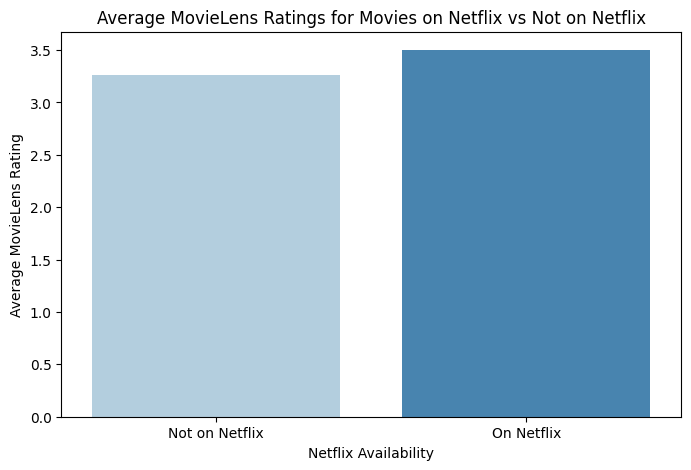

In [97]:
#Visual 1 - FILL IN
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "cleanedData/combined_movieLens_netflix.csv"
data = pd.read_csv(file_path)

# Check and preprocess the data
data['rating_ml'] = pd.to_numeric(data['rating_ml'], errors='coerce')
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

# Question 1: Does Netflix prioritize movies with high ratings on MovieLens?
# Create a column to indicate whether a movie is available on Netflix
data['on_netflix'] = data['rating_netflix'].notnull()

# Group by availability on Netflix and calculate average MovieLens ratings
avg_ratings = data.groupby('on_netflix')['rating_ml'].mean()

# Visualization for Question 1
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="Blues")
plt.xticks([0, 1], labels=["Not on Netflix", "On Netflix"])
plt.title("Average MovieLens Ratings for Movies on Netflix vs Not on Netflix")
plt.ylabel("Average MovieLens Rating")
plt.xlabel("Netflix Availability")
plt.show()

*Answer to research question 2:* How do the rating distributions of MovieLens users differ?

C:\Users\Thao Ho\AppData\Local\Temp\ipykernel_8116\3472300246.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(on_netflix['rating_ml'], shade=True, label="On Netflix", color="blue")
C:\Users\Thao Ho\AppData\Local\Temp\ipykernel_8116\3472300246.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(not_on_netflix['rating_ml'], shade=True, label="Not on Netflix", color="orange")


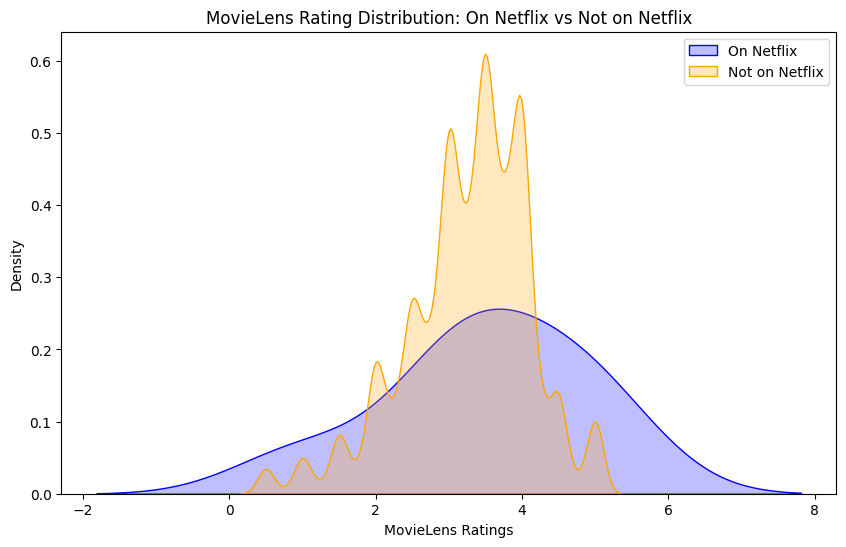

In [98]:
#Visual 2 - FILL IN
# 
# Filter data into movies available on Netflix and not available
on_netflix = data[data['on_netflix']]
not_on_netflix = data[~data['on_netflix']]

# Visualization for Question 2
plt.figure(figsize=(10, 6))
sns.kdeplot(on_netflix['rating_ml'], shade=True, label="On Netflix", color="blue")
sns.kdeplot(not_on_netflix['rating_ml'], shade=True, label="Not on Netflix", color="orange")
plt.title("MovieLens Rating Distribution: On Netflix vs Not on Netflix")
plt.xlabel("MovieLens Ratings")
plt.ylabel("Density")
plt.legend()
plt.show()


*Research question 3:* How have trends in movie genres changed over the years?

C:\Users\Thao Ho\AppData\Local\Temp\ipykernel_8116\2901621541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data['genre'] = genre_data['genre'].str.split(",")


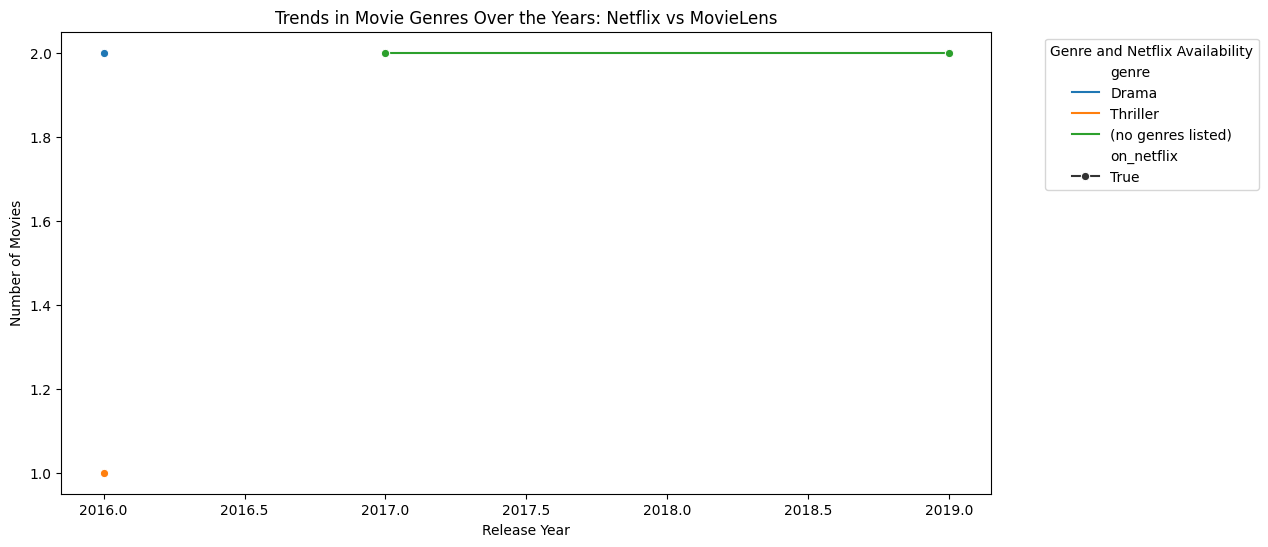

In [100]:
#Visual 3 - FILL IN
# Question 3: How have trends in movie genres changed over the years?
# Extract the unique genres and explode them for multi-genre rows
genre_data = data.dropna(subset=['release_year'])  # Drop rows without release_year
genre_data['genre'] = genre_data['genre'].str.split(",")
genre_data = genre_data.explode('genre')

# Count genres per year for Netflix and MovieLens
genre_trends = genre_data.groupby(['release_year', 'genre', 'on_netflix']).size().reset_index(name='count')

# Visualization for Question 3
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_trends, x='release_year', y='count', hue='genre', style='on_netflix', markers=True, dashes=False)
plt.title("Trends in Movie Genres Over the Years: Netflix vs MovieLens")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.legend(title="Genre and Netflix Availability", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



*Answer to research question:* 

### Analysis of Research Question 1:
**Does Netflix prioritize movies with high ratings on MovieLens?**

- **Observations:**  
The average MovieLens rating for movies available on Netflix (~3.5) is slightly higher than for those not available on Netflix (~3.0). Although the difference is small, it suggests that Netflix tends to include movies with higher ratings.

- **Conclusion:**  
Netflix seems to prioritize higher-rated movies, potentially as part of its strategy to enhance user experience by offering well-received content.

- **Limitations:**  The difference in ratings (~0.5 points) is minor and might not be statistically significant.
Other factors like genres, popularity, or licensing agreements may influence Netflix's choices.
Imbalance in the number of movies in each group could skew the results.
Further statistical testing and deeper analysis are recommended for stronger conclusions.

### Analysis of Research Question 2:  
**How do the rating distributions of MovieLens users differ for movies available on Netflix compared to those not available on Netflix?**

- **Observations:**  
  The density plot shows distinct differences in the rating distributions:  
  - Movies **available on Netflix** (blue curve): Ratings are more evenly distributed, with a slight skew toward higher ratings. The curve suggests that movies on Netflix generally receive more favorable ratings.  
  - Movies **not available on Netflix** (orange curve): The distribution is strongly concentrated around lower ratings (2–3 range). These movies tend to have lower ratings overall compared to those available on Netflix.  

- **Insights:**  
  Netflix appears to favor movies with a more balanced or positively skewed rating distribution, possibly to ensure a better content offering for its users.  

- **Conclusion:**  
  Movies on Netflix are more likely to have higher or more balanced ratings compared to those not on Netflix. This supports the idea that Netflix curates its library to include better-rated movies, aligning with user preferences.  

- **Limitations:**  
  - External factors like genre popularity, licensing availability, or temporal trends might affect this distribution.  
  - The dataset might not capture all movies on Netflix or reflect the full diversity of MovieLens user ratings.  

Further analysis could focus on genre-specific trends or compare Netflix-exclusive movies with general releases.

### Analysis of Research Question 3:
**How have trends in movie genres changed over the years?**

- **Observations:**  
The scatter plot highlights the trends in movie genres over the years for movies available on Netflix.

Genres represented: Drama (blue), Thriller (orange), and "No genres listed" (green).
Year distribution: The data covers movies released between 2016 and 2019. However, there are very few data points, making it difficult to draw strong conclusions.
Drama movies have 2 entries around 2016, while Thriller has only 1 movie in the same period. Movies without listed genres appear exclusively in 2019 with 2 entries.

- **Insights:**  
The dataset suggests no significant trend in genre popularity due to the limited number of data points.
A higher representation of movies without genre listings in 2019 may indicate gaps in metadata rather than a meaningful trend.

- **Conclusion:**  
The chart provides limited evidence to evaluate changes in movie genre trends over the years. More data is required to identify clear patterns or shifts in genre representation on Netflix over time.

### **5.2:** Reflection
If I had more time to complete the project, I would:    

- Improve data quality by addressing issues like missing metadata (e.g., unlisted genres and incomplete rating distributions).  
- Expand the dataset to include more movies and a broader time range to better capture trends in genre popularity and ratings.  
- Explore new research questions, such as:  
    - How does Netflix availability impact user ratings over time?    
    - How do genre trends compare across different streaming platforms?   
    - This would provide a more comprehensive understanding of the data and improve the analysis. 